# Extracción, análisis y transformación de los datos 

### Dependencias

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import joblib
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

### Datos a utilizar

In [3]:
df_2015 = pd.read_csv('./Data/2015.csv')
df_2016 = pd.read_csv('./Data/2016.csv')
df_2017 = pd.read_csv('./Data/2017.csv')
df_2018 = pd.read_csv('./Data/2018.csv')
df_2019 = pd.read_csv('./Data/2019.csv')

### Transformaciones datos 2015

In [4]:
df_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


Eliminación de columnas debido a que no se encuentran en los demás datasets o para el caso de las columnas 'Country' y 'Happiness Rank' para que no se dupliquen valores al momento del merge

In [5]:
columns_to_drop = ['Country', 'Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual']
df_2015 = df_2015.drop(columns_to_drop, axis=1)

Renombramiento de columnas

In [6]:
df_2015 = df_2015.rename(columns={
    'Happiness Score':'happiness_score',
    'Economy (GDP per Capita)':'gdp',
    'Family':'family',
    'Health (Life Expectancy)':'healthy_life_expectancy',
    'Freedom':'freedom',
    'Trust (Government Corruption)':'government_corruption',
    'Generosity':'generosity'
})

Creación de columna 'year'

In [7]:
df_2015['year'] = 2015

Acomodamiento del orden las columnas

In [8]:
df_2015 = df_2015[['year', 'happiness_score', 'gdp', 'family', 'healthy_life_expectancy', 'freedom', 'government_corruption', 'generosity']]

##### Datos dataset 2015 transformados

In [9]:
df_2015.head(3)

,year,happiness_score,gdp,family,healthy_life_expectancy,freedom,government_corruption,generosity
0,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139


### Transformaciones datos 2016

In [10]:
df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


Eliminación de columnas debido a que no se encuentran en los demás datasets o para el caso de las columnas 'Country' y 'Happiness Rank' para que no se dupliquen valores al momento del merge

In [11]:
columns_to_drop = ['Country', 'Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual']
df_2016= df_2016.drop(columns_to_drop, axis=1)

Renombramiento de las columnas

In [12]:
df_2016 = df_2016.rename(columns={
    'Happiness Score':'happiness_score',
    'Economy (GDP per Capita)':'gdp',
    'Family':'family',
    'Health (Life Expectancy)':'healthy_life_expectancy',
    'Freedom':'freedom',
    'Trust (Government Corruption)':'government_corruption',
    'Generosity':'generosity'
})

Creación de columna 'year'

In [13]:
df_2016['year'] = 2016

Acomodamiento del orden de las columnas

In [14]:
df_2016 = df_2016[['year', 'happiness_score', 'gdp', 'family', 'healthy_life_expectancy', 'freedom', 'government_corruption', 'generosity']]

##### Datos del 2016 transformados

In [15]:
df_2016.head(3)

,year,happiness_score,gdp,family,healthy_life_expectancy,freedom,government_corruption,generosity
0,2016,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,2016,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,2016,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678


### Transformaciones datos 2017

In [16]:
df_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


Eliminación de columnas debido a que no se encuentran en los demás datasets o para el caso de las columnas 'Country' y 'Happiness Rank' para que no se dupliquen valores al momento del merge

In [17]:
columns_to_drop = ['Country', 'Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual']
df_2017 = df_2017.drop(columns_to_drop, axis=1)

Renombramiento de columnas

In [18]:
df_2017 = df_2017.rename(columns={
    'Happiness.Score':'happiness_score',
    'Economy..GDP.per.Capita.':'gdp',
    'Family':'family',
    'Health..Life.Expectancy.':'healthy_life_expectancy',
    'Freedom':'freedom',
    'Trust..Government.Corruption.':'government_corruption',
    'Generosity':'generosity'
})

Creación de columna 'year'

In [19]:
df_2017['year'] = 2017

Acomodamiento del orden de las columnas

In [20]:
df_2017 = df_2017[['year', 'happiness_score', 'gdp', 'family', 'healthy_life_expectancy', 'freedom', 'government_corruption', 'generosity']]

##### Datos del 2017 transformados

In [21]:
df_2017.head(3)

,year,happiness_score,gdp,family,healthy_life_expectancy,freedom,government_corruption,generosity
0,2017,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,2017,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,2017,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540


## Función para transformar dataset 2018 y 2019 ya que tiene la misma estructura

In [22]:
def transform_2018_2019(df, year):
    #Eliminación de columnas 
    columns_to_drop = ['Overall rank', 'Country or region']
    df = df.drop(columns_to_drop, axis=1)
    #Renombramiento de columnas
    df = df.rename(columns={
    'Score':'happiness_score',
    'GDP per capita':'gdp',
    'Social support':'family',
    'Healthy life expectancy':'healthy_life_expectancy',
    'Freedom to make life choices':'freedom',
    'Perceptions of corruption':'government_corruption',
    'Generosity':'generosity'
    })
    #Creación columna 'year'
    df['year'] = year
    #Acomodamiento del orden de las columnas
    df = df[['year', 'happiness_score', 'gdp', 'family', 'healthy_life_expectancy', 'freedom', 'government_corruption', 'generosity']]
    return df

### Transformaciones datos 2018

In [23]:
df_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


Aplicación de la función con transformaciones

In [24]:
df_2018 = transform_2018_2019(df_2018, 2018)

###### Datos del 2018 transformados

In [25]:
df_2018.head(3)

,year,happiness_score,gdp,family,healthy_life_expectancy,freedom,government_corruption,generosity
0,2018,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,2018,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,2018,7.555,1.351,1.590,0.868,0.683,0.408,0.284


### Transformaciones datos 2019

In [26]:
df_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


Aplicación de la función con transformaciones

In [27]:
df_2019 = transform_2018_2019(df_2019, 2019)

##### Datos de 2019 transformados

In [28]:
df_2019.head(3)

,year,happiness_score,gdp,family,healthy_life_expectancy,freedom,government_corruption,generosity
0,2019,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,2019,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,2019,7.554,1.488,1.582,1.028,0.603,0.341,0.271


## Concatenación de los datasets

In [29]:
df_total = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])

In [30]:
df_total.head(200)

,year,happiness_score,gdp,family,healthy_life_expectancy,freedom,government_corruption,generosity
0,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
37,2016,6.355,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044
38,2016,6.324,0.83454,0.87119,0.54039,0.50379,0.08701,0.28808
39,2016,6.269,1.09686,0.77866,0.50933,0.52234,0.12692,0.16665
40,2016,6.239,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965


In [31]:
df_total.shape

(782, 8)

In [32]:
columns_to_drop = ['year', 'government_corruption', 'generosity']
df_total = df_total.drop(columns_to_drop, axis=1)

In [33]:
df_total.shape

(782, 5)

In [34]:
df_total.isnull().sum()

happiness_score            0
gdp                        0
family                     0
healthy_life_expectancy    0
freedom                    0
dtype: int64

#### Correlación entre variables

In [163]:
df_total = df_total.reset_index(drop=True)

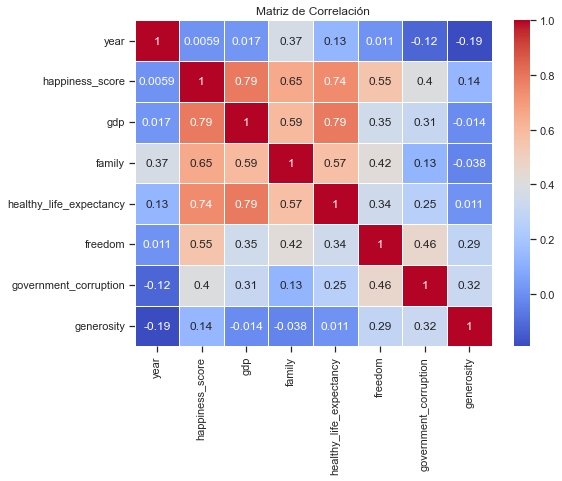

In [168]:
correlation_matrix = df_total.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#### Separación del dataset en test y validación

In [35]:
X=df_total[['gdp', 'family', 'healthy_life_expectancy', 'freedom']]
y=df_total['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
print(f"El total de datos para entrenar el modelo es: {len(X_train)}")

El total de datos para entrenar el modelo es: 547


In [37]:
y_test.to_csv('y_test.csv', index=False)

#### Entrenamiento de modelo de regresión lineal múltiple

In [37]:
model = LinearRegression().fit(X_train, y_train)

In [38]:
joblib.dump(model, 'model.pkl')

['model.pkl']

#### Metricas

##### Error cuadrático medio

In [82]:
mse = mean_squared_error(y_test, y_pred)

In [83]:
mse

0.31977198754552844

##### R^2

In [84]:
r2_score(y_test, y_pred)

0.7439142785996594

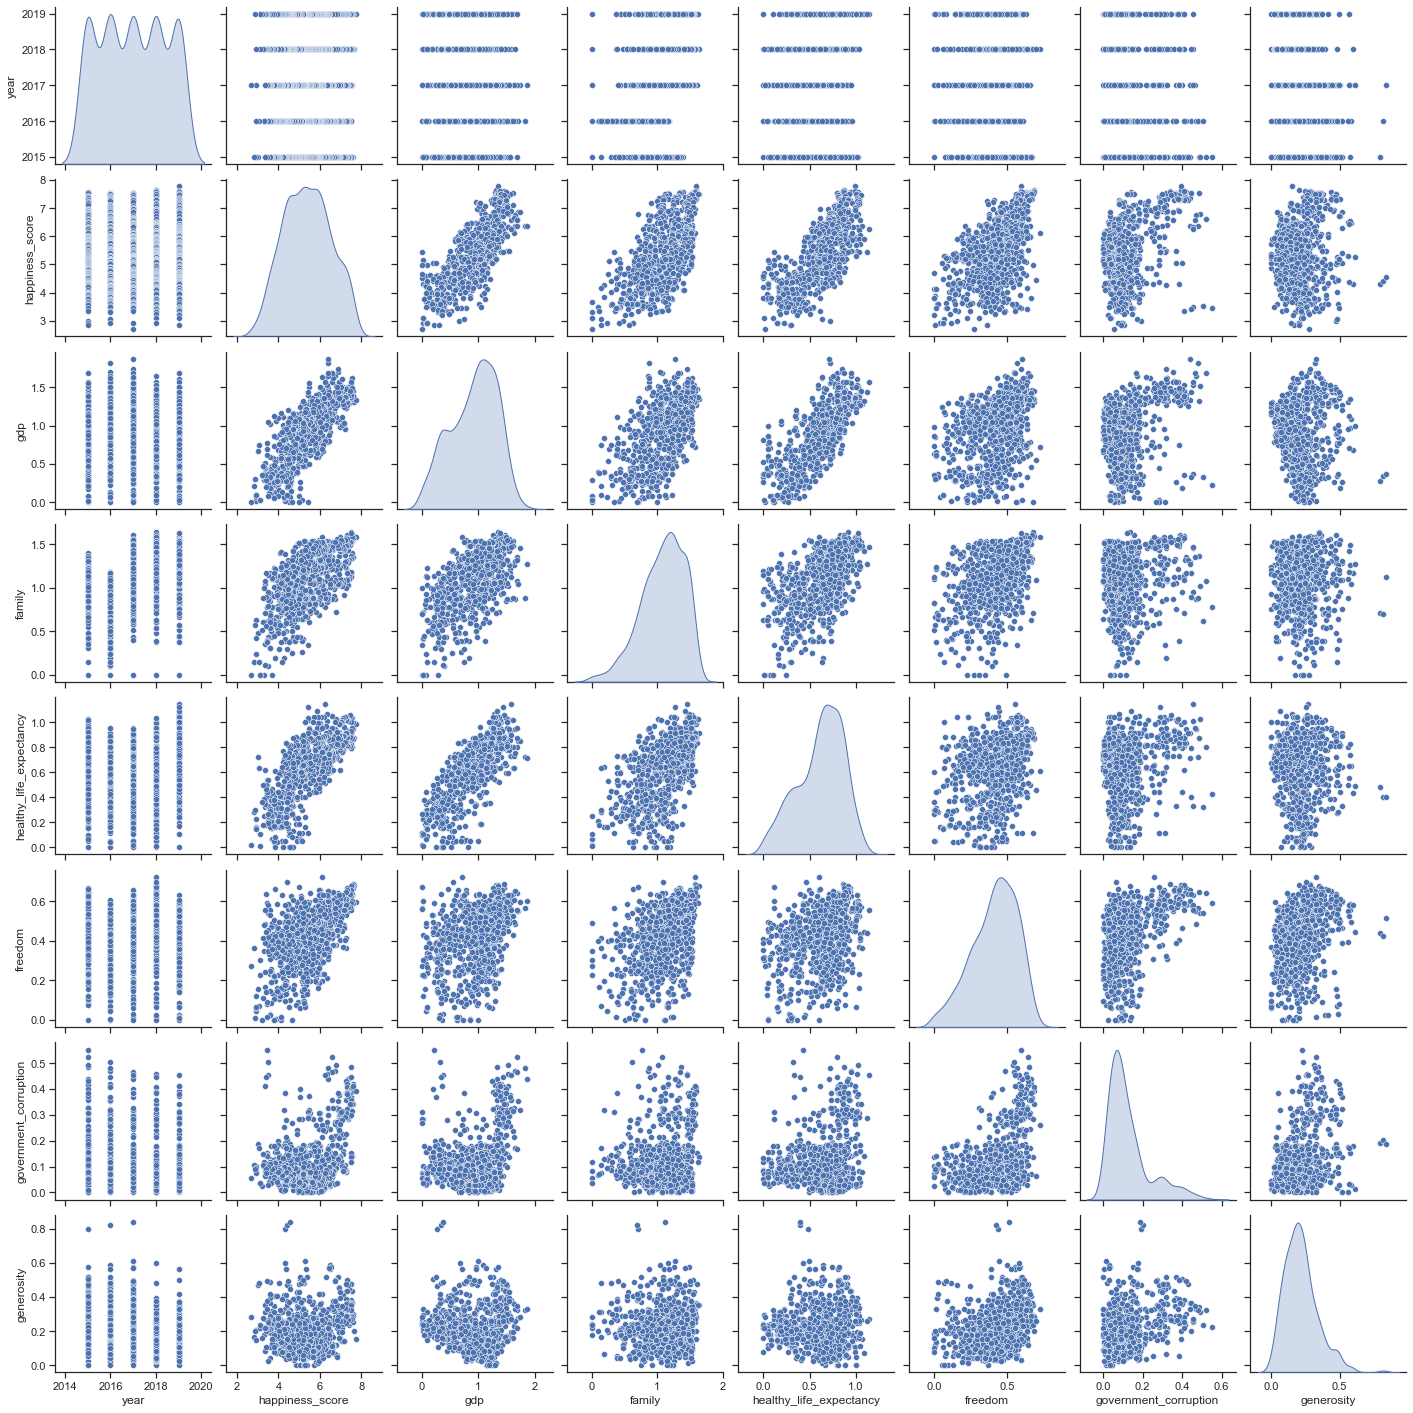

In [164]:
sns.set(style="ticks")
sns.pairplot(df_total, diag_kind="kde")
plt.show()

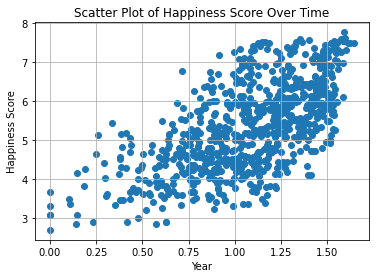

In [134]:
plt.scatter(df_total['family'], df_total['happiness_score'])
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Scatter Plot of Happiness Score Over Time')
plt.grid(True)
plt.show()